In [251]:
#import libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import ADASYN
import pandas as pd
import imblearn
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.decomposition import FastICA
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

In [252]:
data_icu = pd.read_csv('ICUMICE2754.csv')
data_icu.head()

,Age,Gender..female.0..male1.,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.Vomiting,Sore.throat,Runny.nose.Nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,ICU.or.not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [253]:
data_death = pd.read_csv('DeadMICE.csv')
data_death.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocytes,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,death
0,23,0,3,7,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,23,1.7,415,29.1,109,130,30.7,97,0.06,20,102,37.2,0.01,0
1,50,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,21,5.6,150,153.2,108,130,9.2,94,0.08,16,127,37.3,0.01,0
2,29,0,1,7,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1.2,625,42.4,88,133,15.1,97,0.07,19,103,36.9,0.01,0
3,57,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,12.2,206,373.9,67,133,15.4,98,0.05,18,153,37.4,0.01,0
4,26,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,14.3,273,107.7,100,147,18.3,96,0.43,14,120,37.0,0.01,0


In [254]:
data_death.shape

(1020, 43)

In [255]:
data_icu.shape

(1106, 43)

In [258]:
#data_icu['ICU_or_not'].value_counts()/len(data_icu['ICU_or_not'])

In [259]:
data_death['death'].value_counts()/len(data_death['death'])

0    0.860784
1    0.139216
Name: death, dtype: float64

In [260]:
#fix the column names
data_icu.columns = data_icu.columns.str.replace('.','_')

In [261]:
#fix the gender column
data_icu = data_icu.rename(columns={'Gender__female_0__male1_':'Gender'})

In [262]:
data_icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [263]:
#checking for missing values
data_icu.isnull().sum()

Age                             0
Gender                          0
ethnicity                       0
race                            0
Fever                           0
Cough                           0
SOB                             0
Fatigue                         0
Sputum                          0
Myalgia                         0
Diarrhea                        0
Nausea_Vomiting                 0
Sore_throat                     0
Runny_nose_Nasal_congestion     0
Loss_of_smell                   0
Loss_of_taste                   0
Headahce                        0
Chest_discomfort__chest_pain    0
Asymptomatic                    0
smoking_history                 0
hypertensionhx                  0
diabeteshx                      0
asthmahx                        0
coronaryheartdiseasehx          0
copdhx                          0
heartfailurehx                  0
carcinomahx                     0
immunosuppressionhx             0
ckdhx                           0
ALT           

In [264]:
data_icu.describe()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,61.415009,0.573237,1.865280,3.357143,0.666365,0.681736,0.693490,0.232369,0.067812,0.228752,0.235081,0.201627,0.073237,0.045208,0.040687,0.048825,0.096745,0.159132,0.022604,0.248644,0.486438,0.271248,0.059675,0.149186,0.084087,0.072333,0.093128,0.075949,0.091320,47.662749,10.934693,1183.905967,1119.177758,100.138336,403.297468,14.259222,92.677215,1.385325,22.629295,127.981013,37.508590,0.031908,0.245027
std,16.935344,0.494831,0.624483,2.804316,0.471724,0.466013,0.461253,0.422534,0.251537,0.420219,0.424242,0.401397,0.260643,0.207854,0.197654,0.215599,0.295744,0.365965,0.148705,0.432422,0.500042,0.444805,0.236990,0.356433,0.277643,0.259155,0.290744,0.265037,0.288194,99.308219,9.418313,3995.780189,1495.375409,49.285812,427.391233,9.111762,6.619303,9.977642,8.467666,24.559994,1.353958,0.118970,0.430298
min,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.100000,150.000000,5.300000,6.000000,120.000000,0.300000,27.000000,0.020000,5.000000,18.000000,3.600000,0.010000,0.000000
25%,50.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,3.700000,227.000000,327.350000,84.000000,266.000000,7.900000,91.000000,0.100000,18.000000,112.000000,36.900000,0.010000,0.000000
50%,61.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,8.400000,361.000000,696.500000,98.000000,350.000000,12.500000,94.000000,0.170000,20.000000,125.000000,37.300000,0.010000,0.000000
75%,74.000000,1.000000,2.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,15.550000,695.250000,1377.500000,111.000000,470.000000,18.600000,96.000000,0.360000,24.000000,142.000000,38.000000,0.010000,0.000000
max,99.000000,1.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2909.000000,56.600000,63670.000000,22420.000000,1288.000000,13320.000000,72.000000,100.000000,193.500000,165.000000,322.000000,39.700000,2.400000,1.000000


In [265]:
data_icu.dtypes

Age                               int64
Gender                            int64
ethnicity                         int64
race                              int64
Fever                             int64
Cough                             int64
SOB                               int64
Fatigue                           int64
Sputum                            int64
Myalgia                           int64
Diarrhea                          int64
Nausea_Vomiting                   int64
Sore_throat                       int64
Runny_nose_Nasal_congestion       int64
Loss_of_smell                     int64
Loss_of_taste                     int64
Headahce                          int64
Chest_discomfort__chest_pain      int64
Asymptomatic                      int64
smoking_history                   int64
hypertensionhx                    int64
diabeteshx                        int64
asthmahx                          int64
coronaryheartdiseasehx            int64
copdhx                            int64


In [266]:
data_icu['Age'].mean()

61.41500904159132

In [267]:
data_icu['ICU_or_not'].value_counts()

0    835
1    271
Name: ICU_or_not, dtype: int64

#### Symptoms

##### No icu

In [268]:
n_icu = data_icu[data_icu['ICU_or_not']==0]
n_icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
256,22,0,2,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,10,0.7,256,85.8,106,199,41.3,99,0.11,17,105,37.5,0.01,0
257,22,1,1,7,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,77,5.9,160,946.3,119,424,12.7,96,0.10,20,133,37.8,0.01,0
258,22,1,2,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167,16.8,217,2957.0,156,499,13.1,92,0.28,23,124,37.4,0.01,0
259,23,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,37,7.3,150,177.0,110,287,22.7,93,0.06,18,116,36.9,0.01,0
260,23,0,1,7,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,180,14.3,266,1575.0,150,330,13.4,95,0.20,22,126,37.8,0.01,0


In [269]:
n_icu['Fever'].value_counts()/len(n_icu['Fever'])

1    0.653892
0    0.346108
Name: Fever, dtype: float64

In [270]:
icu = data_icu[data_icu['ICU_or_not']==1]
icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [271]:
icu['Fever'].value_counts()/len(icu['Fever'])

1    0.704797
0    0.295203
Name: Fever, dtype: float64

In [272]:
icu['Cough'].value_counts()/len(icu['Cough'])

1    0.704797
0    0.295203
Name: Cough, dtype: float64

In [273]:
icu['SOB'].value_counts()/len(icu['SOB'])

1    0.774908
0    0.225092
Name: SOB, dtype: float64

In [274]:
icu['Fatigue'].value_counts()/len(icu['Fatigue'])

0    0.793358
1    0.206642
Name: Fatigue, dtype: float64

In [275]:
icu['Sputum'].value_counts()

0    246
1     25
Name: Sputum, dtype: int64

In [276]:
icu['Myalgia'].value_counts()

0    210
1     61
Name: Myalgia, dtype: int64

In [277]:
icu['Diarrhea'].value_counts()

0    211
1     60
Name: Diarrhea, dtype: int64

In [278]:
icu['Nausea_Vomiting'].value_counts()

0    223
1     48
Name: Nausea_Vomiting, dtype: int64

In [279]:
icu.head(2)

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1


In [280]:
icu['Sore_throat'].value_counts()

0    250
1     21
Name: Sore_throat, dtype: int64

In [281]:
icu['Runny_nose_Nasal_congestion'].value_counts()

0    257
1     14
Name: Runny_nose_Nasal_congestion, dtype: int64

In [282]:
icu['Loss_of_smell'].value_counts()

0    260
1     11
Name: Loss_of_smell, dtype: int64

In [283]:
icu['Loss_of_taste'].value_counts()

0    259
1     12
Name: Loss_of_taste, dtype: int64

In [284]:
icu['Headahce'].value_counts()

0    243
1     28
Name: Headahce, dtype: int64

In [285]:
icu['Chest_discomfort__chest_pain'].value_counts()

0    228
1     43
Name: Chest_discomfort__chest_pain, dtype: int64

In [286]:
icu['Asymptomatic'].value_counts()/len(icu['Asymptomatic'])

0    0.98155
1    0.01845
Name: Asymptomatic, dtype: float64

In [287]:
symptoms = data_icu[['Fever','Cough','SOB','Fatigue','Sputum','Myalgia','Diarrhea','Nausea_Vomiting','Sore_throat','Runny_nose_Nasal_congestion',
    'Loss_of_smell','Loss_of_taste','Headahce','Chest_discomfort__chest_pain','ICU_or_not']]

In [288]:
symptoms.head()

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,ICU_or_not
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1
2,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [289]:
symptoms.corr()

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,ICU_or_not
Fever,1.000000,0.413980,0.195058,0.030621,0.099322,0.189049,0.098332,0.030591,0.103226,0.052441,0.106899,0.124720,0.095350,0.124343,0.046434
Cough,0.413980,1.000000,0.366742,0.077184,0.168843,0.205744,0.108709,0.053087,0.065412,0.064589,0.111238,0.127780,0.105418,0.143350,0.028205
SOB,0.195058,0.366742,1.000000,0.068597,0.031109,0.095934,0.072574,0.001719,0.066448,0.059708,0.087283,0.077821,0.071626,0.160544,0.100605
Fatigue,0.030621,0.077184,0.068597,1.000000,0.004873,0.108107,0.083725,0.054328,-0.014971,0.034844,0.049232,0.044228,0.029957,-0.028659,-0.034703
Sputum,0.099322,0.168843,0.031109,0.004873,1.000000,0.007222,0.054012,-0.036947,0.048412,0.045167,0.053669,0.055705,0.045548,0.098950,0.055376
Myalgia,0.189049,0.205744,0.095934,0.108107,0.007222,1.000000,0.088959,0.091146,0.061730,0.067993,-0.003202,0.016455,0.222270,0.039660,-0.004964
Diarrhea,0.098332,0.108709,0.072574,0.083725,0.054012,0.088959,1.000000,0.220954,0.081502,0.043575,0.166434,0.220695,0.020530,0.073594,-0.018377
Nausea_Vomiting,0.030591,0.053087,0.001719,0.054328,-0.036947,0.091146,0.220954,1.000000,0.066330,0.031658,0.056198,0.032544,0.102350,0.052449,-0.034796
Sore_throat,0.103226,0.065412,0.066448,-0.014971,0.048412,0.061730,0.081502,0.066330,1.000000,0.189398,0.012373,0.000728,0.060622,0.105409,0.009302
Runny_nose_Nasal_congestion,0.052441,0.064589,0.059708,0.034844,0.045167,0.067993,0.043575,0.031658,0.189398,1.000000,-0.000757,-0.008910,0.061284,0.060002,0.017693


### Statistical Analysis


In [290]:
data_icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [291]:
data_icu['Age'].mean()

61.41500904159132

In [292]:
icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [293]:
data_icu['ICU_or_not'].value_counts()

0    835
1    271
Name: ICU_or_not, dtype: int64

In [294]:
icu['Age'].mean()

59.420664206642066

In [295]:
n_icu['Age'].mean()

62.0622754491018

In [296]:
n_icu['Gender'].value_counts()

1    451
0    384
Name: Gender, dtype: int64

In [297]:
n_icu['ethnicity'].value_counts()

2    507
1    222
3    106
Name: ethnicity, dtype: int64

In [298]:
n_icu['race'].value_counts()

1    453
7    287
2     61
3     26
6      5
4      2
5      1
Name: race, dtype: int64

In [299]:
n_icu['race'].value_counts()/len(n_icu['race'])

1    0.542515
7    0.343713
2    0.073054
3    0.031138
6    0.005988
4    0.002395
5    0.001198
Name: race, dtype: float64

In [300]:
n_icu['smoking_history'].value_counts()

0    621
1    214
Name: smoking_history, dtype: int64

In [301]:
n_icu['diabeteshx'].value_counts()

0    615
1    220
Name: diabeteshx, dtype: int64

In [302]:
n_icu['hypertensionhx'].value_counts()

0    423
1    412
Name: hypertensionhx, dtype: int64

In [303]:
n_icu['asthmahx'].value_counts()

0    792
1     43
Name: asthmahx, dtype: int64

In [304]:
n_icu['copdhx'].value_counts()

0    759
1     76
Name: copdhx, dtype: int64

In [305]:
n_icu['coronaryheartdiseasehx'].value_counts()

0    709
1    126
Name: coronaryheartdiseasehx, dtype: int64

In [306]:
n_icu['heartfailurehx'].value_counts()/len(n_icu['heartfailurehx'])

0    0.925749
1    0.074251
Name: heartfailurehx, dtype: float64

In [307]:
icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [308]:
n_icu['carcinomahx'].value_counts()

0    747
1     88
Name: carcinomahx, dtype: int64

In [309]:
n_icu['immunosuppressionhx'].value_counts()

0    771
1     64
Name: immunosuppressionhx, dtype: int64

In [310]:
n_icu['ckdhx'].value_counts()

0    754
1     81
Name: ckdhx, dtype: int64

In [311]:
icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [312]:
n_icu['Systolic_BP'].mean()

128.99760479041916

In [313]:
n_icu['Temperature'].mean()

37.468862275449105

In [314]:
n_icu['RR'].mean()

21.767664670658682

In [315]:
n_icu['ALT'].mean()

47.02754491017964

In [316]:
n_icu['CRP'].mean()

9.486790419161675

In [317]:
icu.head(2)

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1


In [318]:
n_icu['D_dimer'].mean()

1210.5149700598802

In [319]:
n_icu['Ferritin'].mean()

1005.425748502994

In [320]:
n_icu['LDH'].mean()

377.8526946107784

In [321]:
n_icu['Lymphocyte'].mean()

14.854371257485031

In [322]:
n_icu['Procalcitonin'].mean()

0.9722155688622754

In [323]:
n_icu['Troponin'].mean()

0.029892215568862276

In [324]:
n_icu['HR'].mean()

98.20239520958084

In [325]:
data_death.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocytes,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,death
0,23,0,3,7,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,23,1.7,415,29.1,109,130,30.7,97,0.06,20,102,37.2,0.01,0
1,50,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,21,5.6,150,153.2,108,130,9.2,94,0.08,16,127,37.3,0.01,0
2,29,0,1,7,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1.2,625,42.4,88,133,15.1,97,0.07,19,103,36.9,0.01,0
3,57,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,12.2,206,373.9,67,133,15.4,98,0.05,18,153,37.4,0.01,0
4,26,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,14.3,273,107.7,100,147,18.3,96,0.43,14,120,37.0,0.01,0


In [326]:
data_death['death'].value_counts()

0    878
1    142
Name: death, dtype: int64

In [327]:
symptoms_death = data_death[['Fever','Cough','SOB','Fatigue','Sputum','Myalgia','Diarrhea','Nausea.or.vomiting','Sore.throat','Runny.nose.nasal.congestion',
    'Loss.of.smell','Loss.of.taste','Headahce','Chest.discomfort..Chest.pain','death']]

In [328]:
symptoms_death.head(3)

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,death
0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [329]:
symptoms_death.corr()

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,death
Fever,1.000000,0.403182,0.181600,0.022524,0.097754,0.190326,0.089717,0.021928,0.104096,0.061166,0.111053,0.122393,0.093195,0.113001,-0.081211
Cough,0.403182,1.000000,0.378286,0.088942,0.163761,0.199332,0.106826,0.053430,0.069048,0.062944,0.114827,0.124148,0.094921,0.159424,-0.149239
SOB,0.181600,0.378286,1.000000,0.058247,0.030392,0.108256,0.071214,-0.000810,0.071190,0.054289,0.083599,0.076879,0.068471,0.156763,0.031060
Fatigue,0.022524,0.088942,0.058247,1.000000,0.021779,0.126386,0.084882,0.050871,-0.011413,0.041182,0.057386,0.048314,0.038930,-0.045296,-0.092248
Sputum,0.097754,0.163761,0.030392,0.021779,1.000000,0.003111,0.029780,-0.043475,0.060234,0.019139,0.026997,0.030339,0.034997,0.110674,0.006055
Myalgia,0.190326,0.199332,0.108256,0.126386,0.003111,1.000000,0.073856,0.091843,0.059950,0.063858,-0.002587,0.015964,0.198404,0.050492,-0.119151
Diarrhea,0.089717,0.106826,0.071214,0.084882,0.029780,0.073856,1.000000,0.241004,0.094041,0.028759,0.163911,0.219143,-0.002432,0.073801,-0.040196
Nausea.or.vomiting,0.021928,0.053430,-0.000810,0.050871,-0.043475,0.091843,0.241004,1.000000,0.058742,0.025592,0.052284,0.035925,0.085104,0.035649,-0.128031
Sore.throat,0.104096,0.069048,0.071190,-0.011413,0.060234,0.059950,0.094041,0.058742,1.000000,0.195556,0.020490,0.005629,0.063564,0.114994,-0.037340
Runny.nose.nasal.congestion,0.061166,0.062944,0.054289,0.041182,0.019139,0.063858,0.028759,0.025592,0.195556,1.000000,-0.018808,-0.026664,0.045203,0.051029,-0.031233


In [330]:
len(data_death)

1020

In [331]:
import seaborn as sns

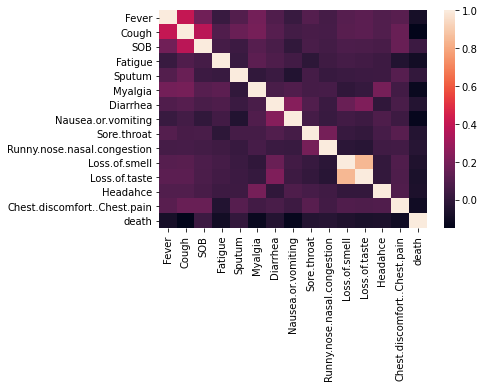

In [332]:
sns.heatmap(symptoms_death.corr(),)

In [333]:
symptoms_death.head(2)

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,death
0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0


In [334]:
death = symptoms_death[symptoms_death['death']==1]
death.head(2)

,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,death
521,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
522,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [335]:
len(death)

142

In [336]:
death['Chest.discomfort..Chest.pain'].value_counts()/len(death['Chest.discomfort..Chest.pain'])

0    0.929577
1    0.070423
Name: Chest.discomfort..Chest.pain, dtype: float64

In [337]:
death['Chest.discomfort..Chest.pain'].value_counts()

0    132
1     10
Name: Chest.discomfort..Chest.pain, dtype: int64

In [339]:
data_death.head(2)

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocytes,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,death
0,23,0,3,7,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,23,1.7,415,29.1,109,130,30.7,97,0.06,20,102,37.2,0.01,0
1,50,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,21,5.6,150,153.2,108,130,9.2,94,0.08,16,127,37.3,0.01,0


In [350]:
death=data_death[data_death['death']==1]
n_death=data_death[data_death['death']==0]

In [428]:
death.head(2)

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.or.vomiting,Sore.throat,Runny.nose.nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..Chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocytes,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,death
521,72,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,15,1.8,199,1467.0,70,212,16.5,98,0.28,16,132,38.1,0.17,1
522,90,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,19.3,1480,131.7,87,212,1.7,96,10.67,17,118,36.7,0.01,1


In [457]:
death['Troponin'].mean()

0.07105633802816902

In [458]:
n_death['Troponin'].mean()

0.02784738041002278

In [465]:
data_icu['ICU_or_not'].value_counts()

0    835
1    271
Name: ICU_or_not, dtype: int64